 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_csv = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True)
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_returns_csv = whale_returns_csv.dropna()
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_csv = pd.read_csv(algo_returns_csv,  index_col='Date', parse_dates=True)
algo_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_returns_csv = algo_returns_csv.dropna()
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_csv = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True)
sp500_history_csv.sort_index(inplace=True)
sp500_history_csv.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_history_csv['Close'].dtype

dtype('O')

In [10]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_csv['Close'] = sp500_history_csv['Close'].str.replace('$','').astype(float)
sp500_history_csv['Close'].dtype

dtype('float64')

In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
daily_return_sp500 = sp500_history_csv.pct_change()
daily_return_sp500.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
# YOUR CODE HERE
daily_return_sp500 = daily_return_sp500.dropna()
daily_return_sp500.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename Column
# YOUR CODE HERE
daily_return_sp500 = daily_return_sp500.rename(columns={"Close":"S&P 500"})
daily_return_sp500.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
joined_data = pd.concat([whale_returns_csv,algo_returns_csv,daily_return_sp500], axis='columns', join='inner')
#joined_data.sort_index(inplace=True)
joined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

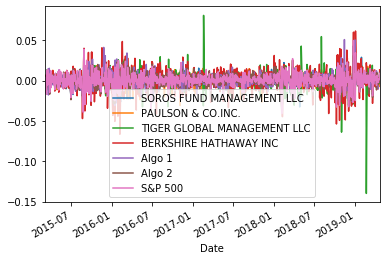

In [15]:
# Plot daily returns
# YOUR CODE HERE
joined_data.plot()

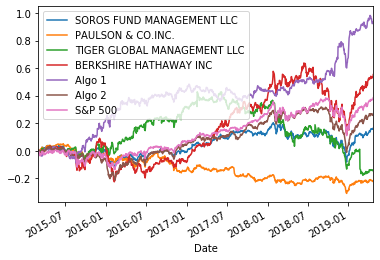

In [16]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1+joined_data).cumprod()-1
cumulative_returns.plot()

---

## Performance by Month and Year

Analyze the performance by Month and Year:

1. Calculate the Annual Returns
2. Sort the 2017 portfolio returns in descending order to determine the best portfolios for 2017
3. Calculate the Monthly Returns
4. Sort in descending order, the porfolio returns for December 2018

In [17]:
# Returns by Year
# YOUR CODE HERE
annual_return = joined_data.groupby([joined_data.index.year]).last()
#annual_return = joined_data.groupby(pd.Grouper(freq='Y')).Sum()
annual_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015,-0.002584,-0.003237,-0.010974,-0.006502,0.013160,-0.003077,-0.009412
2016,-0.001306,0.005322,-0.006238,-0.006362,-0.002822,-0.000829,-0.004637
2017,0.002197,-0.000662,-0.002754,-0.001017,0.002356,-0.005479,-0.005183
2018,0.007059,0.005695,-0.004084,0.005696,0.006768,0.005743,0.008492
2019,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


In [18]:
# Top Portfolio returns for 2017
# YOUR CODE HERE

# Set multi-index by grouping
annual_return_grp = joined_data.groupby([joined_data.index.year, joined_data.index.month]).last()
annual_return_grp.head()
# Select GOOG NOCP for May 2019
annual_return_2017 = annual_return.loc[2017]
annual_return_2017

#/class/03-Python_and_Pandas/3/Activities/09-Stu_Multi_Indexing/Solved/Core/indexing_fever.ipynb

SOROS FUND MANAGEMENT LLC      0.002197
PAULSON & CO.INC.             -0.000662
TIGER GLOBAL MANAGEMENT LLC   -0.002754
BERKSHIRE HATHAWAY INC        -0.001017
Algo 1                         0.002356
Algo 2                        -0.005479
S&P 500                       -0.005183
Name: 2017, dtype: float64

In [19]:
# Returns by Month
# YOUR CODE HERE

# Set multi-index by grouping
annual_return_grp = joined_data.groupby([joined_data.index.year, joined_data.index.month]).first()
annual_return_grp.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date Date                                                  
2015 3                     -0.001266           -0.004981   
     4                      0.000919            0.000157   
     5                      0.006051            0.002551   
     6                      0.002081           -0.000113   
     7                     -0.001365            0.002100   

           TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date Date                                                                  
2015 3                       -0.000496               -0.006569 -0.001942   
     4                       -0.002002               -0.003865 -0.002956   
     5                        0.006526                0.009650  0.005197   
     6                        0.000837                0.002916 -0.006465   
     7                        0.005815               -0.001304 -0.007847   

             Algo 2   S&P 500  
Date Date                      
2015 3    -0.000949 -0.004539  
     4     0.003005 -0.003965  
     5     0.003263  0.010923  
     6     0.000898  0.002059  
     7     0.002724  0.006936

In [20]:
# Top Portfolio Returns for December 2018
# YOUR CODE HERE

# Slice DataFrame into 1 year timeframe
#/class/03-Python_and_Pandas/3/Activities/09-Stu_Multi_Indexing/Solved/Core/indexing_fever.ipynb
# Set multi-index by grouping
annual_return_grp = joined_data.groupby([joined_data.index.year, joined_data.index.month]).first()
annual_December_return_2018 = annual_return_grp.loc[2018,12]

annual_December_return_2018

SOROS FUND MANAGEMENT LLC      0.002403
PAULSON & CO.INC.              0.000530
TIGER GLOBAL MANAGEMENT LLC    0.004975
BERKSHIRE HATHAWAY INC         0.022943
Algo 1                         0.004465
Algo 2                         0.009465
S&P 500                        0.010941
Name: (2018, 12), dtype: float64

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

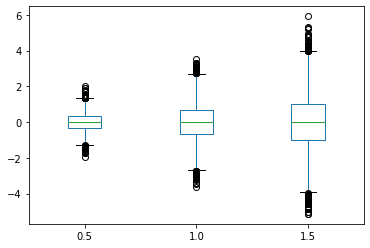

In [21]:
# Box plot to visually show risk
# YOUR CODE HERE

#class/03-Python_and_Pandas/3/Activities/15-Ins_Std_Dev_Risk/Solved/std_dev_risk.ipynb

# scale means that the random distribution of points comes from a distribution with a std dev of that scale value.


portfolio_a_std = np.random.normal(scale=0.5, size=10000)
portfolio_b_std = np.random.normal(scale=1.0, size=10000)
portfolio_c_std = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5": portfolio_a_std,
    "1.0": portfolio_b_std,
    "1.5": portfolio_c_std
})

# Plot box plot
portfolio_std.plot.box()

In [22]:
# Daily Standard Deviations

# Calculate std dev

all_portfolio_std = joined_data.std()
#/class/03-Python_and_Pandas/3/Activities/17-Stu_Risky_Business/Solved/Core/risky_business.ipynb

# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?

# YOUR CODE HERE
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [23]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

volatility = joined_data.std()
volatility.sort_values(inplace=True)
volatility
#class/04-Pandas/1/Activities/09-Stu_Portfolio_Planner_Part_II/Solved/portfolio_planner_part_2.ipynb

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [24]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

#/class/03-Python_and_Pandas/3/Activities/15-Ins_Std_Dev_Risk/Solved/std_dev_risk.ipynb
annualized_std = joined_data.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

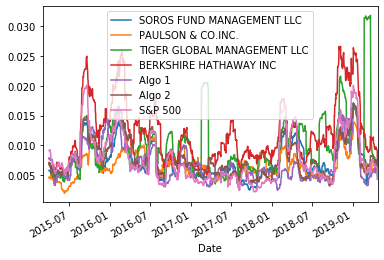

In [25]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE

joined_data.rolling(window=21).std().plot()

#/class/04-Pandas/1/Activities/09-Stu_Portfolio_Planner_Part_II/Solved/portfolio_planner_part_2.ipynb

In [26]:
# Correlation
# YOUR CODE HERE
# Calculate the correlation of closing prices
price_correlatio = joined_data.corr()
price_correlatio
#/class/04-Pandas/2/Activities/11-correlation-01/Solved/correlation-01.ipynb

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


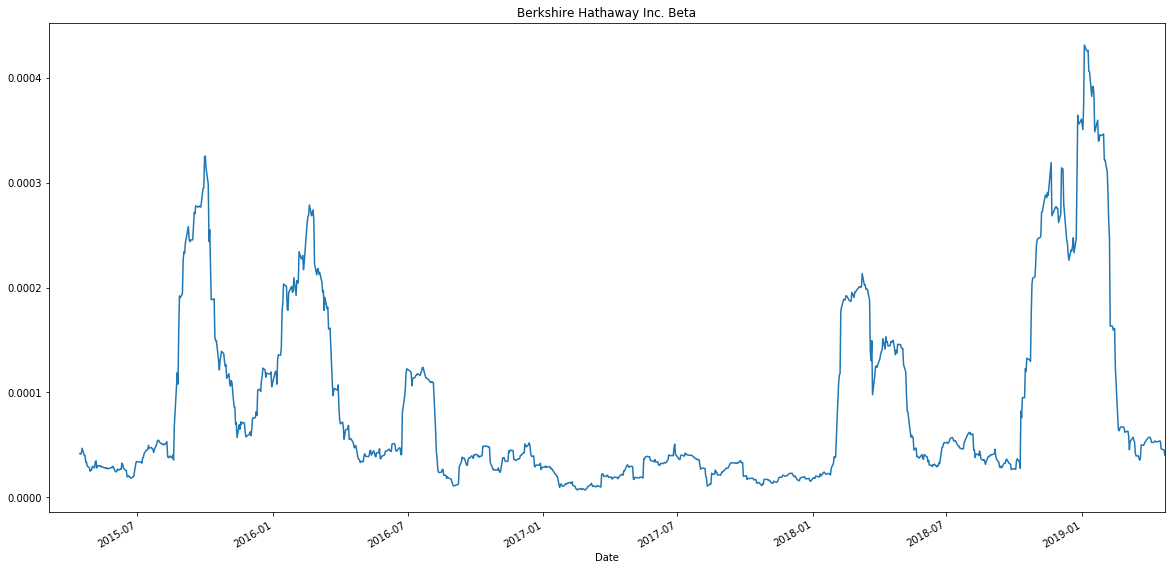

In [27]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
covariance = joined_data['BERKSHIRE HATHAWAY INC'].cov(joined_data['S&P 500'])
covariance

# Calculate Variance of SP500 Returns
variance = joined_data['S&P 500'].var()
variance

# Calculate beta of all daily returns
berkshire_beta = covariance / variance
berkshire_beta

#class/04-Pandas/2/Activities/12-beta-01/Solved/beta.ipynb

# Calculate 30-day rolling covariance of MSFT vs. S&P 500 and plot the data
rolling_covariance = joined_data['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(joined_data['S&P 500'])
rolling_covariance.plot(figsize=(20, 10), title='Berkshire Hathaway Inc. Beta')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

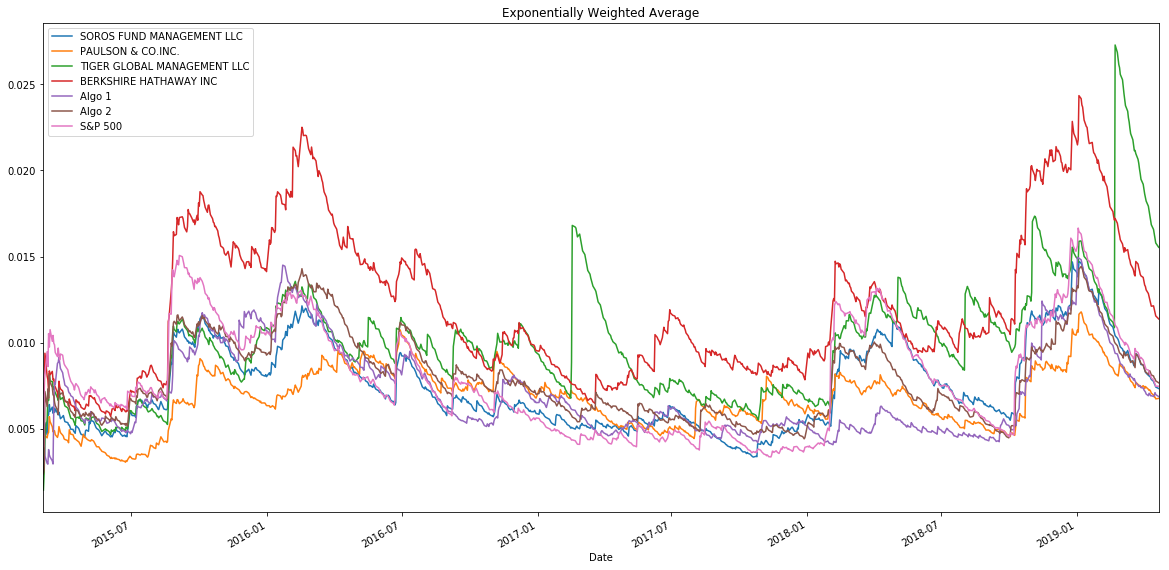

In [28]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [28]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

sharpe_ratios = (joined_data.mean() * 252) / (joined_data.std() * np.sqrt(252))
sharpe_ratios

#class/03-Python_and_Pandas/3/Activities/16-Ins_Sharpe_Ratios/Solved/sharpe_ratios.ipynb

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

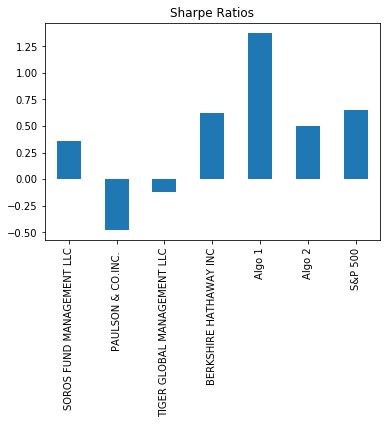

In [29]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Read the first stock
# YOUR CODE HERE
google_csv = Path("../Resources/goog_historical.csv")
# YOUR CODE HERE
google_csv = pd.read_csv(google_csv, index_col='Trade DATE', parse_dates=True)
google_csv.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [31]:
# Read the second stock
# YOUR CODE HERE
apple_csv = Path("../Resources/aapl_historical.csv")
# YOUR CODE HERE
apple_csv = pd.read_csv(apple_csv, index_col='Trade DATE', parse_dates=True)
apple_csv.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [32]:
# Read the third stock
# YOUR CODE HERE
cost_csv = Path("../Resources/cost_historical.csv")
# YOUR CODE HERE
cost_csv = pd.read_csv(cost_csv, index_col='Trade DATE', parse_dates=True)
cost_csv.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [33]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

join_DataFrame_rows = pd.concat([google_csv,apple_csv,cost_csv], axis='rows', join='inner')
join_DataFrame_rows.head()

#/class/03-Python_and_Pandas/3/Activities/12-Ins_Concat_DataFrame/Solved/concat_dataframes.ipynb

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [34]:
# Reset the index
# YOUR CODE HERE

raw_DataFrame_reset = pd.concat([google_csv,apple_csv,cost_csv], axis="rows", join="inner")
raw_DataFrame = raw_DataFrame_reset.reset_index()
raw_DataFrame.head()
#Desktop/Class_Repo/class/04-Pandas/1/Activities/07-Ins_Portfolio_Returns/Solved/portfolio_returns.ipynb

,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40


In [35]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE
pivot_DataFrame = raw_DataFrame.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
pivot_DataFrame.head()
#Desktop/Class_Repo/class/04-Pandas/1/Activities/07-Ins_Portfolio_Returns/Solved/portfolio_returns.ipynb

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [36]:
# Drop Nulls
# YOUR CODE HERE
pivot_DataFrame = pivot_DataFrame.pct_change()
daily_returns_DataFrame = pivot_DataFrame.dropna()
my_portafilio_dailyReturns = pivot_DataFrame.dropna()
daily_returns_DataFrame.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
portfolio_returns = daily_returns_DataFrame.dot(weights)
portfolio_returns.head()

#/class/04-Pandas/1/Activities/08-Stu_Portfolio_Planner_Part_I/Solved/portfolio_planner_part_1.ipynb

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# YOUR CODE HERE

#pivot by values
pivot_DataFrame2 = raw_DataFrame.pivot_table(values="NOCP", index="Trade DATE")

#daily returns consolidated
daily_returns_portfolio = pivot_DataFrame2.pct_change()
daily_returns_portfolio = daily_returns_portfolio.dropna()
#change column name
daily_returns_portfolio = daily_returns_portfolio.rename(columns={'NOCP':'Custom'})

#join dataframes

daily_return_all_data = pd.concat([joined_data,daily_returns_portfolio], axis='columns', join='inner')
daily_return_all_data.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.001093
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.015550
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.005140
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.002370
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.009248


In [39]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE
portfolio_grp = daily_return_all_data.groupby([daily_return_all_data.index.year, daily_return_all_data.index.month]).first()
portfolio_grp

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
2018 5                    0.000000            0.000000   
     6                    0.005212            0.003764   
     7                    0.000150            0.002083   
     8                   -0.015330           -0.005112   
     9                   -0.001579           -0.004159   
     10                  -0.004046            0.000251   
     11                   0.015545            0.022372   
     12                   0.002403            0.000530   
2019 1                    0.006027            0.015429   
     2                    0.010911            0.006006   
     3                    0.005292            0.006227   
     4                    0.009000            0.010073   

         TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
2018 5                      0.000000                0.000000  0.000915   
     6                      0.005158                0.013490 -0.003979   
     7                     -0.006130                0.006801 -0.000747   
     8                     -0.011223                0.000135  0.006178   
     9                     -0.017688               -0.014065 -0.000860   
     10                     0.006181               -0.005250 -0.002388   
     11                     0.022348                0.020185  0.028359   
     12                     0.004975                0.022943  0.004465   
2019 1                      0.007881               -0.001554  0.050342   
     2                     -0.002556                0.001810  0.002912   
     3                     -0.011270                0.006593 -0.000713   
     4                      0.003972                0.013182  0.008159   

           Algo 2   S&P 500    Custom  
2018 5   0.001635  0.000884  0.001093  
     6   0.007212  0.010849  0.025012  
     7   0.002093  0.003068  0.008538  
     8  -0.002942 -0.001037  0.007613  
     9  -0.002850 -0.001654 -0.011263  
     10 -0.001319  0.003641  0.001892  
     11  0.019114  0.010558 -0.001601  
     12  0.009465  0.010941  0.012657  
2019 1   0.018022  0.001269  0.008210  
     2   0.002222  0.000899 -0.006611  
     3   0.010077  0.006895  0.015604  
     4   0.007257  0.011569  0.015236

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [40]:
# Risk
# YOUR CODE HERE

#calc Standard dev

annualized_std_all = daily_return_all_data.std() * np.sqrt(252)
annualized_std_all.sort_values(inplace=True)
annualized_std_all

PAULSON & CO.INC.              0.116732
Algo 1                         0.133704
Algo 2                         0.139556
SOROS FUND MANAGEMENT LLC      0.146675
S&P 500                        0.152054
Custom                         0.228804
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
dtype: float64

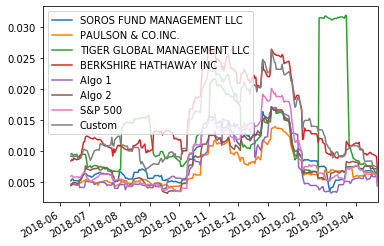

In [41]:
# Rolling
# YOUR CODE HERE

daily_return_all_data.rolling(window=21).std().plot()

In [45]:
# Beta
# YOUR CODE HERE
# Calculate covariance of all daily returns of MSFT vs. AAPL
covariance = daily_return_all_data['Custom'].cov(daily_return_all_data['S&P 500'])
covariance

variance = daily_return_all_data['S&P 500'].var()
variance

Custom_beta = covariance / variance
Custom_beta.plot(figsize=(20, 10))

AttributeError: 'numpy.float64' object has no attribute 'plot'

In [46]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (daily_return_all_data.mean() * 252) / (daily_return_all_data.std() * np.sqrt(252))
#class/04-Pandas/1/Activities/08-Stu_Portfolio_Planner_Part_I/Solved/portfolio_planner_part_1.ipynb

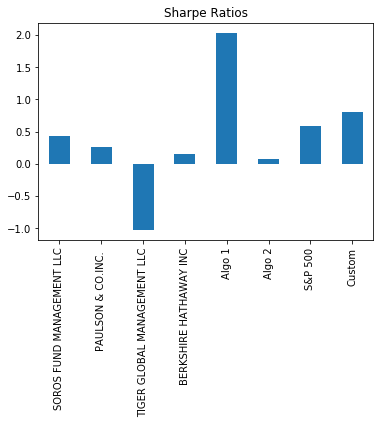

In [47]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [48]:
# YOUR CODE HERE
#/class/04-Pandas/1/Activities/02-Stu_Correlation/Solved/diversification.ipynb
# Use the `corr` function to calculate correlations for each stock pair
correlation = daily_return_all_data.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.724218
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.606450
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.340536
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.841143
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.275728
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.725587
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.847217
Custom,0.724218,0.606450,0.340536,0.841143,0.275728,0.725587,0.847217,1.000000
